In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
os.chdir('E:/Info_Viz/archive')

In [7]:
team_memberships = pd.read_csv("TeamMemberships.csv")
teams = pd.read_csv("Teams.csv")
user_achievements = pd.read_csv("UserAchievements.csv")

D:\Installation\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
team_memberships.columns, teams.columns, user_achievements.columns

(Index(['Id', 'TeamId', 'UserId', 'RequestDate'], dtype='object'),
 Index(['Id', 'CompetitionId', 'TeamLeaderId', 'TeamName',
        'ScoreFirstSubmittedDate', 'LastSubmissionDate',
        'PublicLeaderboardSubmissionId', 'PrivateLeaderboardSubmissionId',
        'IsBenchmark', 'Medal', 'MedalAwardDate', 'PublicLeaderboardRank',
        'PrivateLeaderboardRank'],
       dtype='object'),
 Index(['Id', 'UserId', 'AchievementType', 'Tier', 'TierAchievementDate',
        'Points', 'CurrentRanking', 'HighestRanking', 'TotalGold',
        'TotalSilver', 'TotalBronze'],
       dtype='object'))

In [9]:
team_memberships.shape, teams.shape, user_achievements.shape

((5132610, 4), (5019285, 13), (10657671, 11))

In [10]:
teams = teams.rename({'Id': 'TeamId'}, axis='columns')
teams

,TeamId,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
0,496,2435,647.0,team1,NaN,05/04/2010,2192.0,2192.0,False,NaN,09/06/2018,59.0,83.0
1,497,2435,619.0,jonp,NaN,04/30/2010,2182.0,2182.0,False,3.0,07/15/2016,41.0,25.0
2,499,2435,663.0,Bwaas,NaN,05/01/2010,2184.0,2184.0,False,NaN,09/06/2018,102.0,100.0
3,500,2435,673.0,Thylacoleo,NaN,07/10/2010,2187.0,2187.0,False,3.0,07/15/2016,31.0,23.0
4,501,2435,435.0,pjonesdotcda,NaN,05/05/2010,2194.0,2191.0,False,NaN,09/06/2018,67.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019280,8332368,9120,9975523.0,Sharanjaa S,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
5019281,8332373,9120,7488019.0,Marcos Macchi,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
5019282,8332374,19989,5518812.0,Hậu Trần _DLK1,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
5019283,8332375,5408,6086659.0,best sky,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [11]:
x_axis = pd.merge(team_memberships, teams, on=["TeamId"])
x_axis = x_axis[["TeamId", "UserId","TeamName","PublicLeaderboardRank","CompetitionId"]]
# Team Rank
x_axis = x_axis[["TeamId","UserId","PublicLeaderboardRank","CompetitionId"]]
x_axis

,TeamId,UserId,PublicLeaderboardRank,CompetitionId
0,518,635,1.0,2408
1,526,839,2.0,2408
2,527,816,3.0,2408
3,528,778,4.0,2408
4,529,747,5.0,2408
...,...,...,...,...
5132603,8279629,9752833,NaN,34985
5132604,8262551,2770062,NaN,35058
5132605,8262565,7772549,NaN,35058
5132606,8264168,9722929,NaN,35058


In [12]:
y_axis = pd.merge(team_memberships,user_achievements, on =["UserId"])
# Best Member
y_axis = y_axis[["UserId","CurrentRanking","HighestRanking"]]
y_axis = y_axis[["UserId","CurrentRanking"]]
y_axis

,UserId,CurrentRanking
0,635,NaN
1,635,NaN
2,635,NaN
3,839,NaN
4,839,NaN
...,...,...
10714777,1892948,NaN
10714778,1892948,NaN
10714779,1300114,NaN
10714780,1300114,NaN


In [13]:
data = pd.merge(x_axis,y_axis, on =["UserId"])
data

,TeamId,UserId,PublicLeaderboardRank,CompetitionId,CurrentRanking
0,518,635,1.0,2408,NaN
1,518,635,1.0,2408,NaN
2,518,635,1.0,2408,NaN
3,526,839,2.0,2408,NaN
4,526,839,2.0,2408,NaN
...,...,...,...,...,...
165040408,8239318,1892948,NaN,34897,NaN
165040409,8239318,1892948,NaN,34897,NaN
165040410,8308788,1300114,NaN,35288,NaN
165040411,8308788,1300114,NaN,35288,NaN


In [14]:
# x_axis= x_axis.set_index('UserId')
# x_axis
# y_axis = y_axis.set_index('UserId')
# y_axis

In [15]:
dataX = data
dataX.shape

(165040413, 5)

In [16]:
dataX = dataX.dropna()
dataX.shape

(13695575, 5)

In [17]:
dataX = dataX.drop_duplicates(subset=['TeamId','UserId','PublicLeaderboardRank'], keep='first')
dataX.shape

(123727, 5)

In [18]:
x = dataX.groupby(['CompetitionId']).nunique().sort_values(by=['TeamId'],ascending=False)
x[x['TeamId']<=500]

,TeamId,UserId,PublicLeaderboardRank,CurrentRanking
CompetitionId,,,,
12863,499,542,499,536
5874,494,521,494,519
5558,491,528,491,525
10686,488,576,488,568
4272,473,489,473,489
...,...,...,...,...
19321,1,1,1,1
19375,1,1,1,1
19444,1,1,1,1


In [43]:
comp_ids = [10418,23823,3641,4104,30201,14013,14420,26938,25360,35214,33400,14268,34510,29653,29594,16245]

In [44]:
for i in range(len(comp_ids)):
    if i ==0 : dataX1 = dataX[dataX["CompetitionId"]==comp_ids[i]]
    else: dataX1 = pd.concat([dataX1, dataX[dataX["CompetitionId"]==comp_ids[i]]])

In [45]:
dataX1

,TeamId,UserId,PublicLeaderboardRank,CompetitionId,CurrentRanking
183357,2261198,352740,1953.0,10418,799.0
329385,2210188,1183600,174.0,10418,533.0
744660,2188353,200110,782.0,10418,396.0
1223407,2481320,495084,1754.0,10418,6454.0
1613217,2420560,1927,914.0,10418,5673.0
...,...,...,...,...,...
161537114,5001707,2360956,44.0,16245,316.0
161576593,4988171,3390641,334.0,16245,1123.0
161613735,5132147,2626211,131.0,16245,107.0
161734301,4926175,3740954,74.0,16245,5146.0


In [46]:
blue = dataX1[abs(dataX1['PublicLeaderboardRank'] - dataX1['CurrentRanking']) <=100]
red = dataX1[dataX1['PublicLeaderboardRank'] < dataX1['CurrentRanking']]
green = dataX1[dataX1['PublicLeaderboardRank'] >= dataX1['CurrentRanking']]

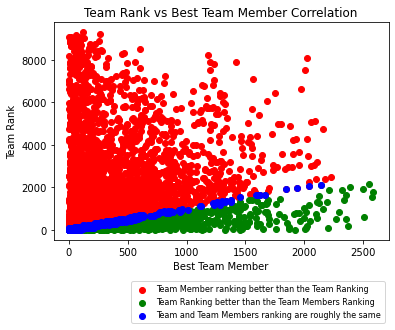

In [47]:
# dataX = dataX.head(1000)
r = plt.scatter(red["PublicLeaderboardRank"], red["CurrentRanking"], c ="red")
# dataX = dataX.head(1000)
g = plt.scatter(green["PublicLeaderboardRank"], green["CurrentRanking"], c ="green")
b = plt.scatter(blue["PublicLeaderboardRank"], blue["CurrentRanking"], c ="blue")
plt.title("Team Rank vs Best Team Member Correlation")
plt.xlabel("Best Team Member")
plt.ylabel("Team Rank")
plt.legend((r,g,b),('Team Member ranking better than the Team Ranking',
                   'Team Ranking better than the Team Members Ranking',
                   'Team and Team Members ranking are roughly the same'),
           fontsize=8,ncol=1,loc = 'lower right',bbox_to_anchor=(1, -0.4))
plt.show()

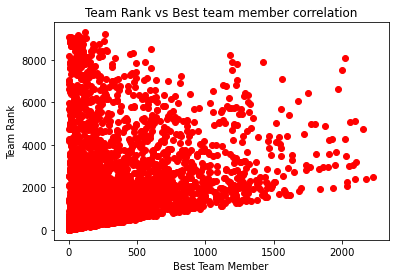

In [48]:
# dataX = dataX.head(1000)
plt.scatter(red["PublicLeaderboardRank"], red["CurrentRanking"], c ="red")
plt.title("Team Rank vs Best team member correlation")
plt.xlabel("Best Team Member")
plt.ylabel("Team Rank")
plt.show()

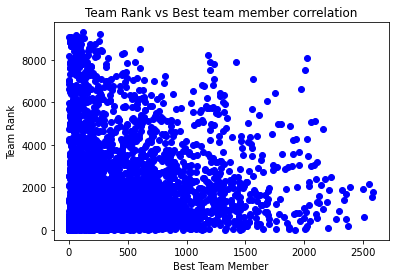

In [49]:
# dataX = dataX.head(1000)
plt.scatter(dataX1["PublicLeaderboardRank"], dataX1["CurrentRanking"], c ="blue")
plt.title("Team Rank vs Best team member correlation")
plt.xlabel("Best Team Member")
plt.ylabel("Team Rank")
plt.show()

In [50]:
dataX

,TeamId,UserId,PublicLeaderboardRank,CompetitionId,CurrentRanking
9,528,778,4.0,2408,9477.0
24,863,778,48.0,2435,9477.0
54,1300,778,5.0,2442,9477.0
69,4424,778,7.0,2489,9477.0
675,544,887,17.0,2408,9286.0
...,...,...,...,...,...
164987070,7849140,1513667,482.0,28012,604.0
165028423,7985983,3865944,306.0,33060,1124.0
165031398,7880981,3180230,96.0,30201,2863.0
165031404,7834584,3180230,44.0,31703,2863.0


In [ ]:
# y_axis["CurrentRanking"].count()

In [ ]:
# plt.yticks(np.arange(0, 10000, 500))
# plt.xticks(np.arange(0, 10000, 500))
# plt.xticks( range(0,80,10) )   
# plt.yticks( range(0,250,50) )
# plt.figure(figsize=(200,200))
# plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))